In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
loans = pd.read_csv('loan_data.csv')

**A panoramic view of the data using info(), head(), and describe() methods on loans.**

In [3]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [4]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [5]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


# Exploratory Data Analysis



**A histogram of two FICO distributions on top of each other, one for each credit.policy outcome.**

<Axes: >

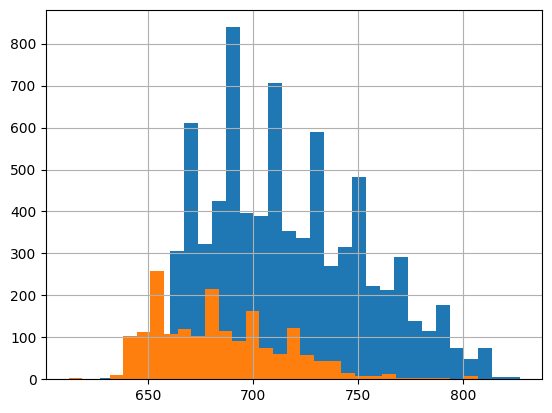

In [6]:
loans[loans['credit.policy']==1]['fico'].hist(bins=30)
loans[loans['credit.policy']==0]['fico'].hist(bins=30)

<Axes: >

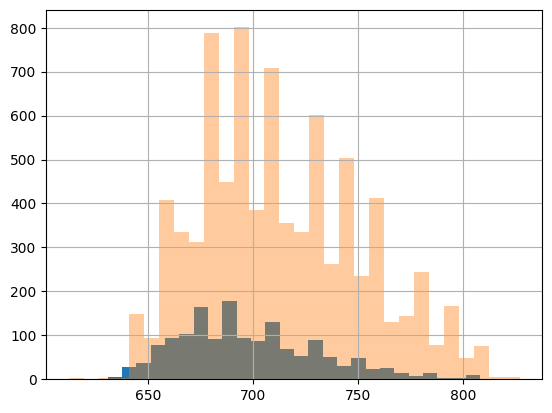

In [9]:
loans[loans['not.fully.paid']==1]['fico'].hist(bins=30)
loans[loans['not.fully.paid']==0]['fico'].hist(bins=30, alpha=0.4)

**A countplot using seaborn showing the counts of loans by purpose, with the color hue defined by not.fully.paid.**

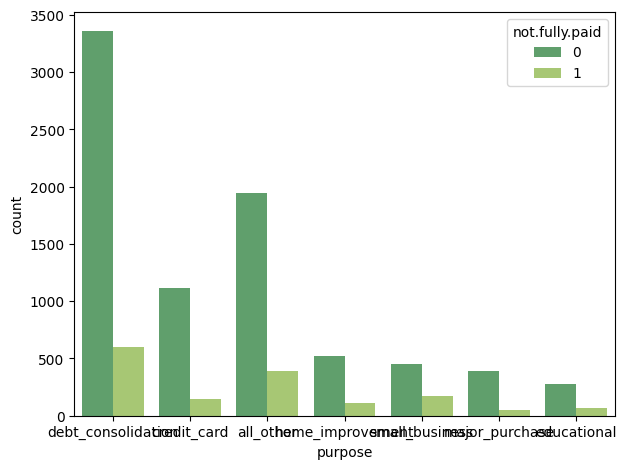

In [11]:
sns.countplot(x='purpose',data=loans,hue='not.fully.paid',palette='summer')
plt.tight_layout()

**The trend between FICO score and interest rate.**

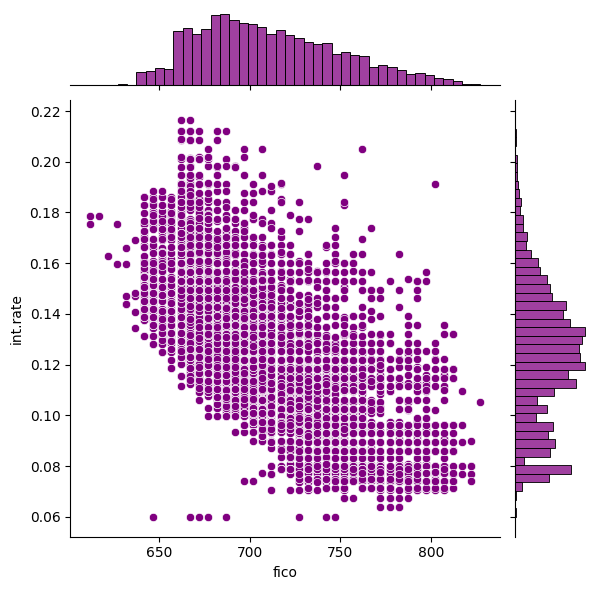

In [12]:
sns.jointplot(x='fico',y='int.rate',data=loans,color='purple')

**Lmplots to see if the trend differs between not.fully.paid and credit.policy.**

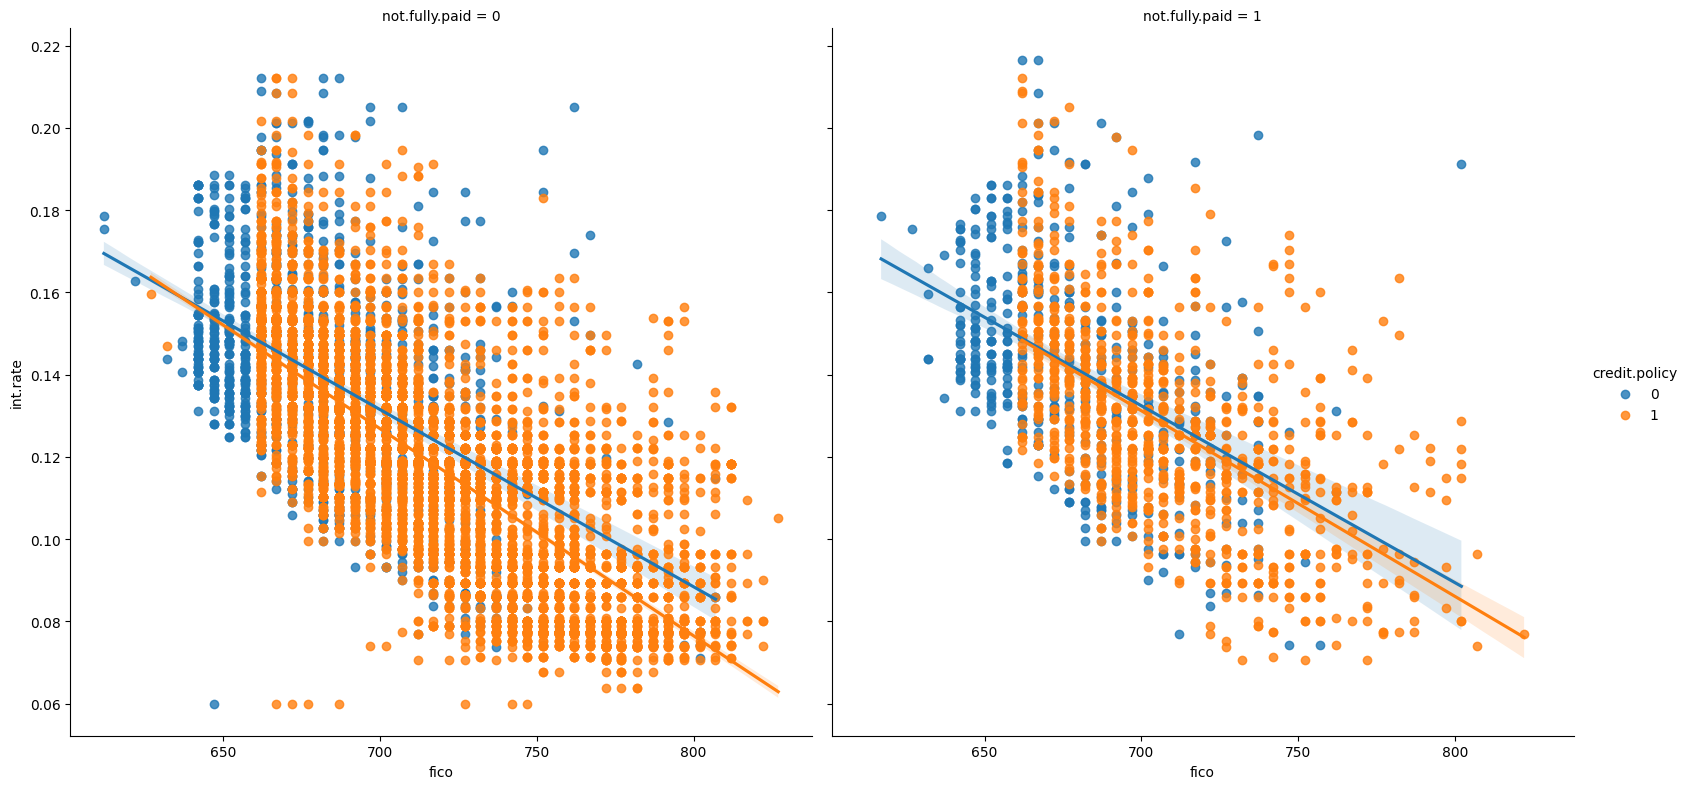

In [13]:
sns.lmplot(x='fico',y='int.rate',data=loans,hue='credit.policy',col='not.fully.paid',height=8)

# Setting up the Data for the Random Forest Classification Model

In [14]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [15]:
loans.head(3)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0


## Categorical Features

Since the **purpose** column is categorical. It will be transformed using dummy variables so sklearn will be able to understand them. 

In [16]:
cat_feats= ['purpose']

In [17]:
final_data=pd.get_dummies(loans,columns=cat_feats,drop_first=True)

In [18]:
final_data.head(3)

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,False,True,False,False,False,False
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,True,False,False,False,False,False
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,False,True,False,False,False,False


## Train Test Split


In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X= final_data.drop('not.fully.paid',axis=1)
y= final_data['not.fully.paid']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Training a Decision Tree Model

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
dtree = DecisionTreeClassifier()

In [25]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

## Predictions and Evaluation of Decision Tree

In [26]:
predictions = dtree.predict(X_test)

In [27]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      2431
           1       0.20      0.25      0.23       443

    accuracy                           0.73      2874
   macro avg       0.53      0.54      0.53      2874
weighted avg       0.76      0.73      0.75      2874



In [28]:
print(confusion_matrix(y_test,predictions))

[[2000  431]
 [ 332  111]]


## Training the Random Forest model

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
ranf= RandomForestClassifier(n_estimators=200)

In [31]:
ranf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

## Predictions and Evaluation

In [32]:
predictions= ranf.predict(X_test)

In [50]:
from sklearn.metrics import classification_report, confusion_matrix

In [33]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.38      0.01      0.03       443

    accuracy                           0.84      2874
   macro avg       0.61      0.50      0.47      2874
weighted avg       0.77      0.84      0.78      2874



**Confusion Matrix for the predictions.**

In [34]:
print(confusion_matrix(y_test,predictions))

[[2421   10]
 [ 437    6]]


#### Results

Comparing the Decision tree classifier with the random forest classifier. It is evident that the Random Forest Classifer is better and produces better results than the Decision tree classifier